In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

loan=pd.read_csv("C:/Users/Kushagra/Desktop/Data Science learnings/Datasets/Loan payments data.csv")
loan.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [110]:
loan.shape

(500, 11)

In [111]:
loan.duplicated().sum()

0

In [112]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [113]:
loan.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


### Data Cleaning

In [114]:
total=loan.isnull().sum()
percent=(((loan.isnull().sum()/loan.isnull().count()))*100)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data

,Total,Percent
Loan_ID,0,0.0
loan_status,0,0.0
Principal,0,0.0
terms,0,0.0
effective_date,0,0.0
due_date,0,0.0
paid_off_time,100,20.0
past_due_days,300,60.0
age,0,0.0
education,0,0.0


Looks like paid_off_time and past_due_days having alot of missing values

Removing null values from both the above columns. I am going to replace the missing values with new values

In [115]:
loan['past_due_days']=loan['past_due_days'].fillna(0)

# Filling empty values with -1
loan['paid_off_time']=loan['paid_off_time'].fillna(-1)

In [116]:
loan.isnull().sum()

Loan_ID           0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
paid_off_time     0
past_due_days     0
age               0
education         0
Gender            0
dtype: int64

In [117]:
loan['education'].unique()

array(['High School or Below', 'Bechalor', 'college', 'Master or Above'],
      dtype=object)

#### Spelling correction in education

In [118]:
loan['education']=loan['education'].replace('Bechalor','Bachelor')

In [119]:
loan.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,0.0,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,0.0,50,Bachelor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,0.0,33,Bachelor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,0.0,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,0.0,28,college,female


In [120]:
loan.dtypes

Loan_ID            object
loan_status        object
Principal           int64
terms               int64
effective_date     object
due_date           object
paid_off_time      object
past_due_days     float64
age                 int64
education          object
Gender             object
dtype: object

Changing the data types of some columns to date time

In [121]:
loan['effective_date']=pd.to_datetime(loan['effective_date'])
loan['due_date']=pd.to_datetime(loan['due_date'])
loan['paid_off_time']=pd.to_datetime(loan['paid_off_time']).dt.date
loan['paid_off_time']=pd.to_datetime(loan['paid_off_time'])

loan.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-14,0.0,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-10-07,0.0,50,Bachelor,female
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-25,0.0,33,Bachelor,female
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,2016-09-22,0.0,27,college,male
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-09-23,0.0,28,college,female


## Exploratory Data Analysis

Text(0.5, 1.0, 'Loan payments')

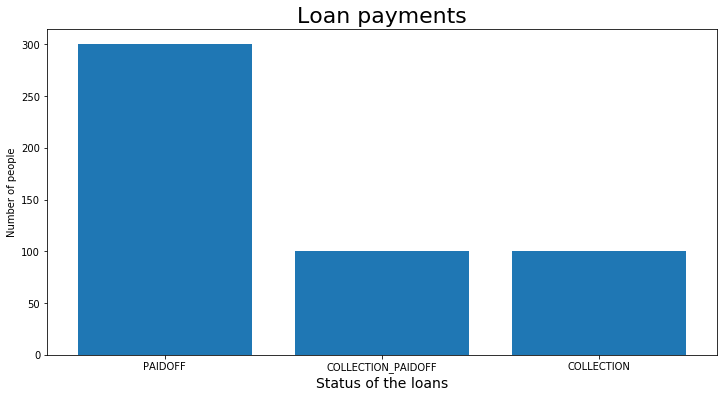

In [18]:
a=loan['loan_status'].value_counts()
plt.figure(figsize=(12,6))
plt.bar(a.index,a.values)
plt.xlabel("Status of the loans",size=14)
plt.ylabel("Number of people")
plt.title("Loan payments",size=22)

In [19]:
a=loan['Gender'].value_counts()
a

male      423
female     77
Name: Gender, dtype: int64

Out of 500 people 423 are males and 77 are females who have taken up loans

Text(0.5, 1.0, 'Relationship between loan status and Gender')

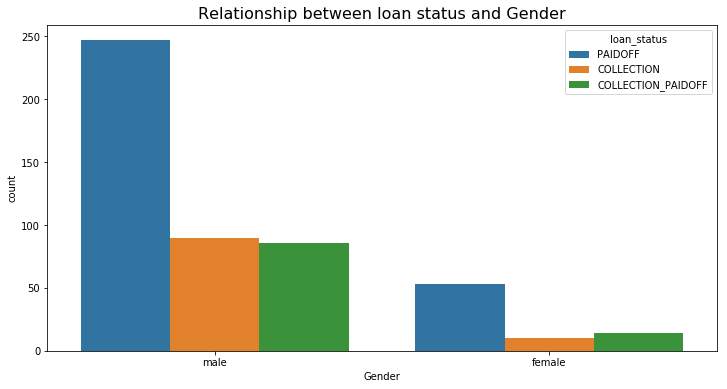

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(loan['Gender'],hue=loan['loan_status'])
plt.title("Relationship between loan status and Gender",size=16)

#### Education analysis

([<matplotlib.patches.Wedge at 0x1a104e52400>,
 [Text(0.2061194541375137, 1.080515974257694, 'High School or Below'),
  Text(-0.6521424802814796, -0.8858386904015427, 'Bachelor'),
  Text(0.9801072140121813, -0.4993894763020948, 'college'),
  Text(1.099652610605003, -0.027643009778271017, 'Master or Above')],
 [Text(0.11242879316591656, 0.5893723495951058, '44%'),
  Text(-0.3557140801535343, -0.48318474021902325, '42%'),
  Text(0.5346039349157352, -0.27239425980114257, '13%'),
  Text(0.5998105148754562, -0.015078005333602372, '1%')])

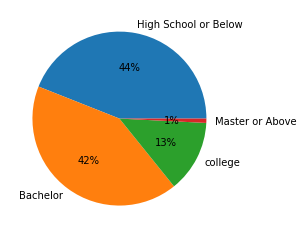

In [29]:
plt.pie(loan['education'].value_counts(),labels=loan['education'].unique(),autopct='%1.f%%')

Looks like most of the people here have either finished Bachelors or just high school

Text(0.5, 1.0, 'Education and loan status')

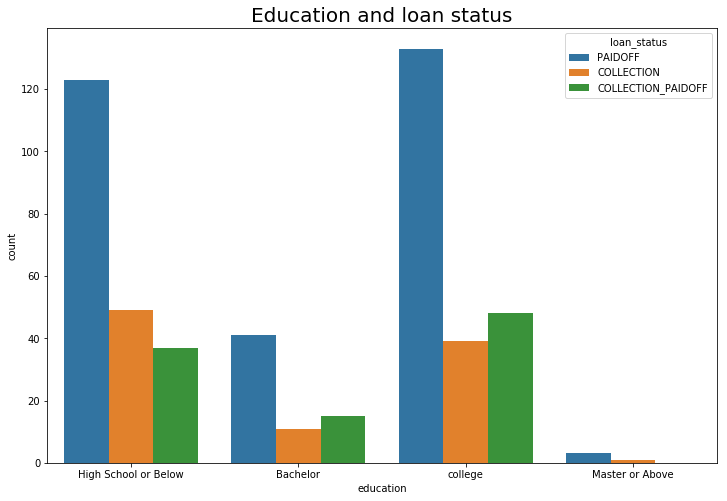

In [32]:
plt.figure(figsize=(12,8))
sns.countplot(loan['education'],hue=loan['loan_status'])
plt.title("Education and loan status",size=20)

Majority of the loan takers are either from college or from High School and very less are from the masters background.

##### Age and loan status

(array([ 14.,  41., 104., 133.,  75.,  59.,  42.,  13.,  13.,   6.]),
 array([18. , 21.3, 24.6, 27.9, 31.2, 34.5, 37.8, 41.1, 44.4, 47.7, 51. ]),
 <a list of 10 Patch objects>)

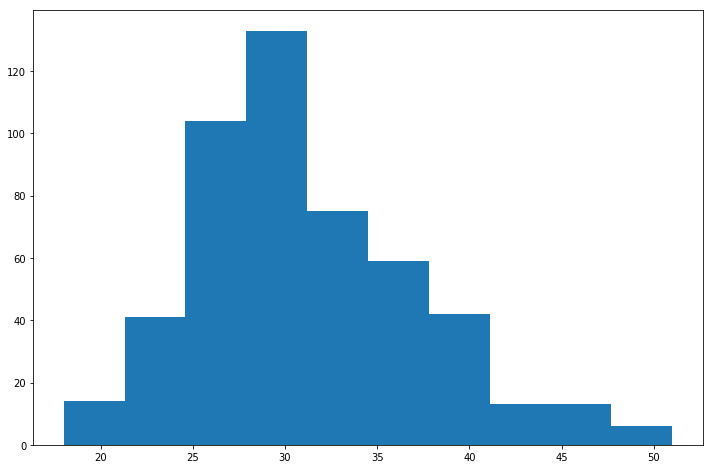

In [37]:
plt.figure(figsize=(12,8))
plt.hist(loan['age'])

Majority of the people who take loan are between the ages of 25 to 35

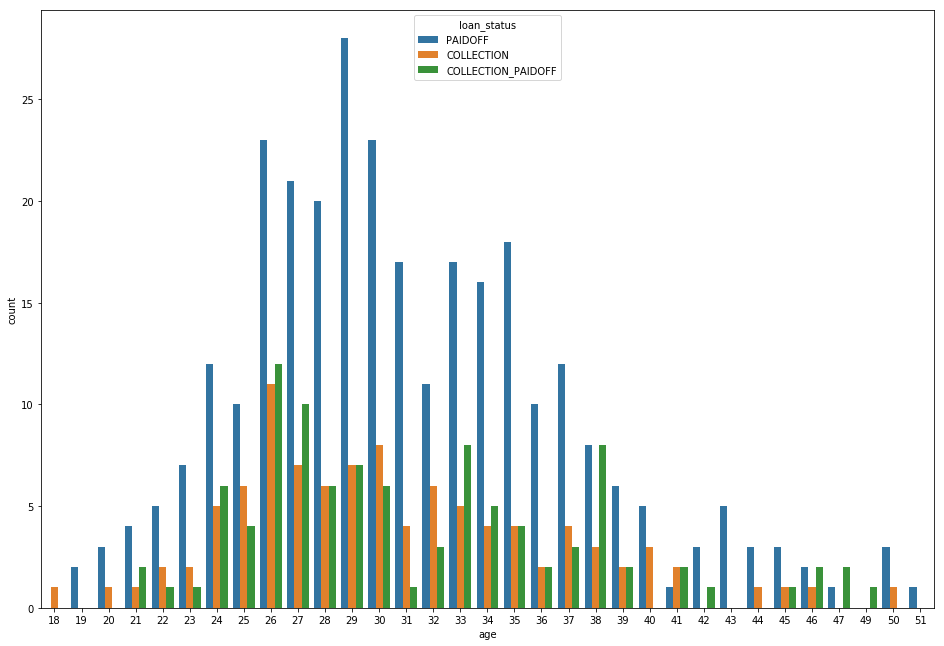

In [41]:
plt.figure(figsize=(16,11))
sns.countplot(loan['age'],hue=loan['loan_status'])


#### terms

object


Text(0.5, 1.0, 'Number of terms that people have received')

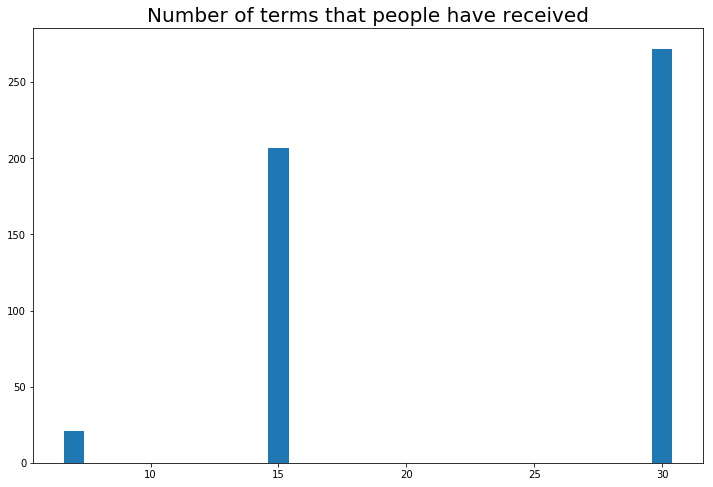

In [47]:
x=loan['terms']
x=x.astype('object')
print(x.dtype)
plt.figure(figsize=(12,8))
a=x.value_counts()
plt.bar(a.index,a.values)
plt.title("Number of terms that people have received",size=20)

Text(0.5, 1.0, 'Number of terms and loan status')

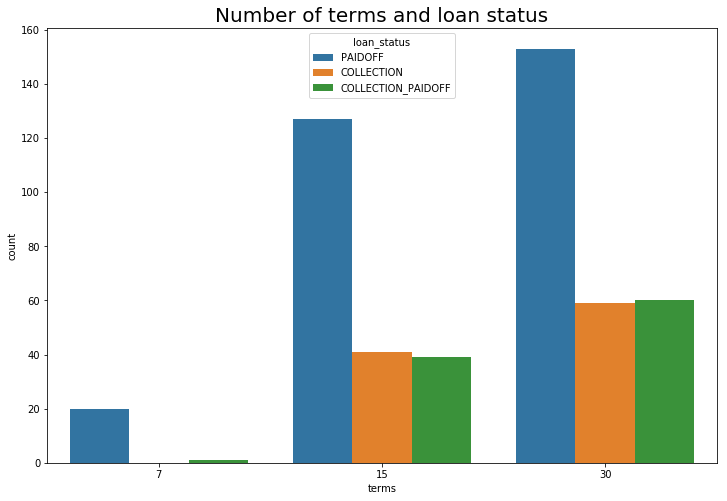

In [50]:
plt.figure(figsize=(12,8))
sns.countplot(loan['terms'],hue=loan['loan_status'])
plt.title("Number of terms and loan status",size=20)

#### Principal and loan status

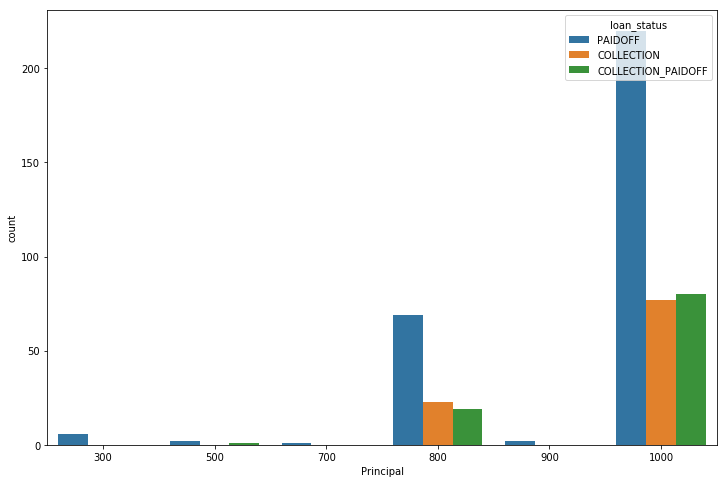

In [51]:
plt.figure(figsize=(12,8))
sns.countplot(loan['Principal'],hue=loan['loan_status'])


Majority of people have opted for the principle between 800 to 1000

#### Loan effective date analysis

In [53]:
d=loan.groupby(['effective_date'])['loan_status'].value_counts()
pd.DataFrame(d)

loan_status
effective_date loan_status                    
2016-09-08     PAIDOFF                       4
2016-09-09     COLLECTION                    5
               COLLECTION_PAIDOFF            5
               PAIDOFF                       5
2016-09-10     COLLECTION                   20
               PAIDOFF                      19
               COLLECTION_PAIDOFF            7
2016-09-11     PAIDOFF                     119
               COLLECTION                   71
               COLLECTION_PAIDOFF           41
2016-09-12     PAIDOFF                      97
               COLLECTION_PAIDOFF           47
               COLLECTION                    4
2016-09-13     PAIDOFF                      23
2016-09-14     PAIDOFF                      33

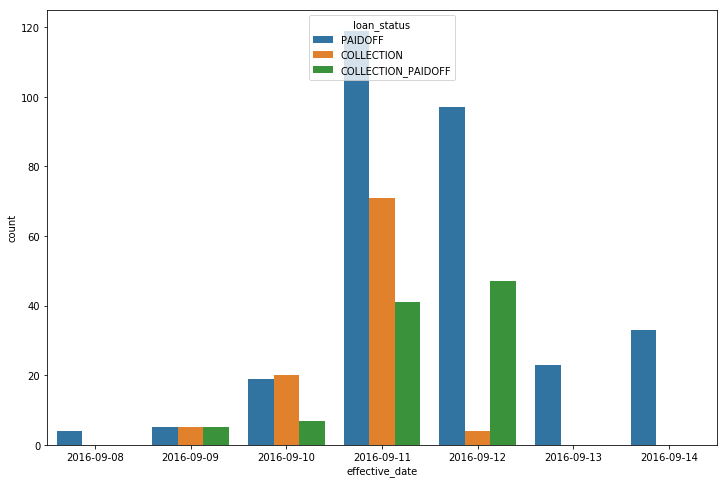

In [56]:
plt.figure(figsize=(12,8))
x=loan['effective_date'].dt.date
sns.countplot(x,hue=loan['loan_status'])


A lot of loans were given away on 11 and 12th September. Maybe because it was a start of a fiscal year or something

#### Data Distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A108491CC0>,
      dtype=object)

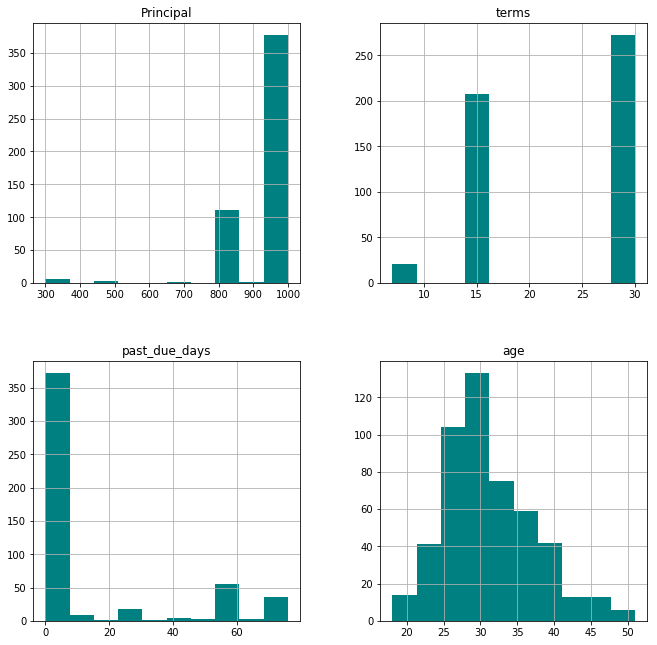

In [58]:
loan.hist(figsize=(11,11),color="#008080")

In [63]:
px.scatter(loan,x="age",y="past_due_days",size="terms",color="loan_status",
           hover_data=['Gender','Principal'], log_x=True, size_max=10)

#### Majority of the old people have paid back in time

## Loan correlation

[Text(0.5, 0, 'Principal'),
 Text(1.5, 0, 'terms'),
 Text(2.5, 0, 'past_due_days'),
 Text(3.5, 0, 'age')]

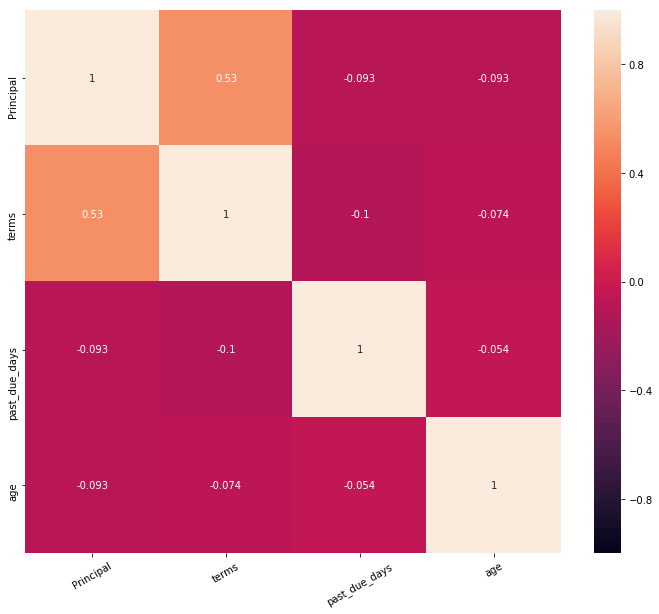

In [65]:
correlation=loan[loan.columns].corr()
plt.figure(figsize=(12, 10))
plot=sns.heatmap(correlation,vmin=-1,vmax=1,annot=True,annot_kws={"size":10})
plot.set_xticklabels(plot.get_xticklabels(), rotation=30)

## Conclusions drawn from the Data Analysis

-> 20% of the people have not repaid the loan 20% of the people have repaid the loan but lately after due date and 60% of the      people have repaid the loan on time
-> Majority of the loan takers are from High School or College background.
-> Majority of the people who took loan have age ranging from 24 years to 38 years.
-> Majority of the people have opted for Principal of  800and 1000
-> Majority of the late payments are from people who have their loan terms as 15 days and 30 days.
-> Most of the Elder people (35 - 50 years) have paid back loan on time.



## Data Modelling

In [122]:
loan.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-14,0.0,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-10-07,0.0,50,Bachelor,female
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-25,0.0,33,Bachelor,female
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,2016-09-22,0.0,27,college,male
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-09-23,0.0,28,college,female


#### Removing unnecessary columns

In [123]:
loan=loan.drop(columns=['Loan_ID','paid_off_time','effective_date','due_date','past_due_days'])
loan.head()

,loan_status,Principal,terms,age,education,Gender
0,PAIDOFF,1000,30,45,High School or Below,male
1,PAIDOFF,1000,30,50,Bachelor,female
2,PAIDOFF,1000,30,33,Bachelor,female
3,PAIDOFF,1000,15,27,college,male
4,PAIDOFF,1000,30,28,college,female


#### Label encoding the categorical data

In [124]:
enc = LabelEncoder()

loan['loan_status']=enc.fit_transform(loan['loan_status'])

loan['loan_status'].value_counts()

2    300
1    100
0    100
Name: loan_status, dtype: int64

In [125]:
loan['education']=enc.fit_transform(loan['education'])
loan['Gender']=enc.fit_transform(loan['Gender'])

In [126]:
loan.head()

,loan_status,Principal,terms,age,education,Gender
0,2,1000,30,45,1,1
1,2,1000,30,50,0,0
2,2,1000,30,33,0,0
3,2,1000,15,27,3,1
4,2,1000,30,28,3,0


#### Assigning X and Y

In [141]:
X=loan.drop(['loan_status'],axis=1)
y=loan['loan_status']


In [142]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=999,stratify=y)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(375, 5)
(375,)
(125, 5)
(125,)


In [153]:
params_knn={'n_neighbors':np.arange(1,40,1),'p':[1,2]}

knn=GridSearchCV(estimator=KNeighborsClassifier(),
                param_grid=params_knn,
                cv=cv_method,
                verbose=1)

knn.fit(X_train,y_train)

Fitting 5 folds for each of 78 candidates, totalling 390 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:    5.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=True),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39]), 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [154]:
knn.best_params_

{'n_neighbors': 21, 'p': 1}

In [155]:
knn.best_score_

0.6106666666666667

In [146]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [144]:
from sklearn.tree import DecisionTreeClassifier

In [149]:
scoring_metric='roc_auc'

cv_method = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)

params_DecisionTree={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':np.arange(1,12,1),
                    'max_features':['auto','sqrt','log2']}

dt=GridSearchCV(estimator=DecisionTreeClassifier(),
                param_grid=params_DecisionTree,
                cv=cv_method,
                verbose=1)

dt.fit(X_train,y_train)

Fitting 5 folds for each of 132 candidates, totalling 660 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 660 out of 660 | elapsed:    1.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=True),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]), 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [150]:
dt.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'auto',
 'splitter': 'random'}

In [151]:
dt.best_score_

0.6026666666666667